<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Иван! Ты здорово поработал над всеми комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Объёмная и творческая аналитическая задача, тем интереснее будет с ней справиться! </div>

### Откройте файл с данными и изучите общую информацию. 

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [314]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

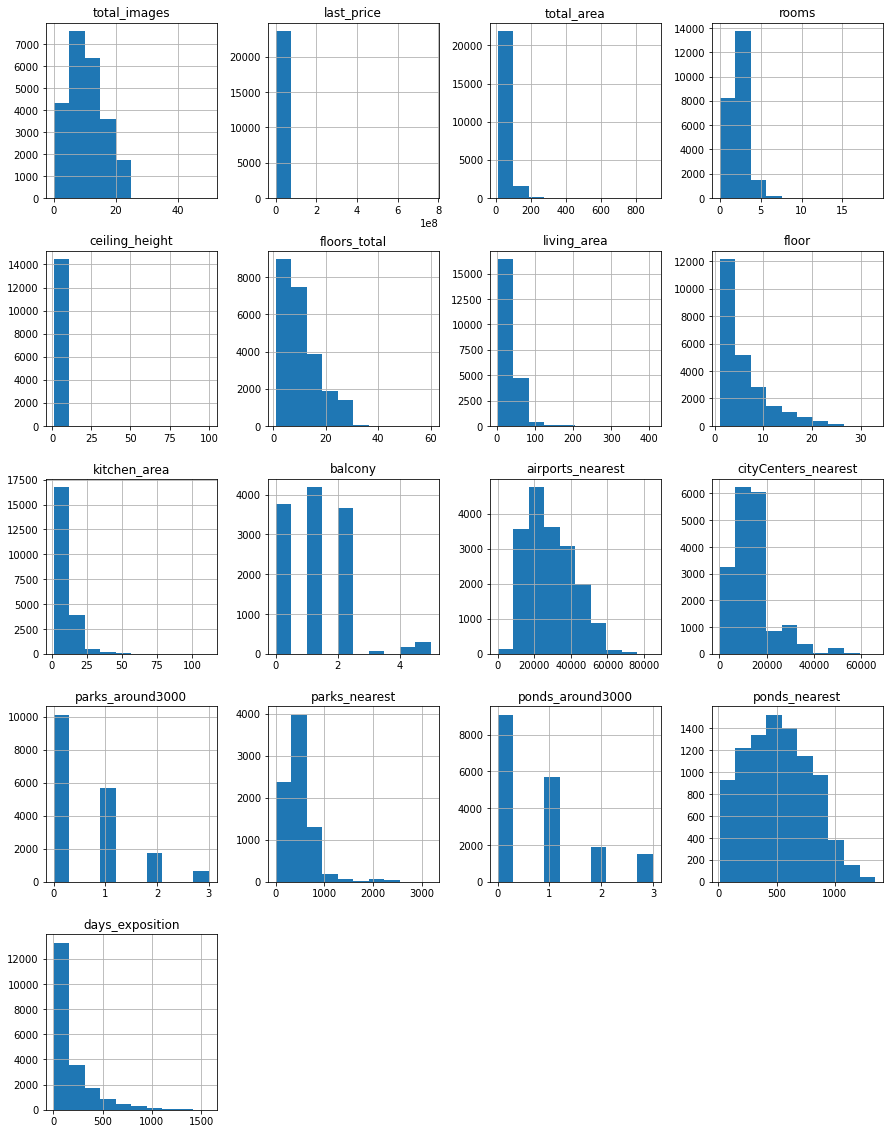

In [316]:
df.hist(figsize=(15,20))

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее начало, так держать. </div>

### Предобработка данных

Считаем пропуски

In [317]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### ceiling_height

посмотрим как респределена высота потолков и заменим пропуски в ceiling_height медианным значением:

<AxesSubplot:>

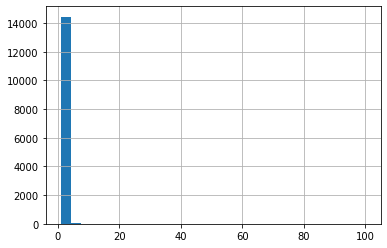

In [318]:
df['ceiling_height'].hist(bins=30)

Видим, что есть вбросы, отреже слишком нереалистичную высоту потолков, которая вне диапазона от 2 до 5 метров

<AxesSubplot:>

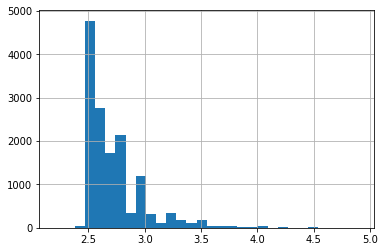

In [319]:
good_df = df[df['ceiling_height'] < 5]
good_df = good_df[good_df['ceiling_height'] > 2]
good_df['ceiling_height'].hist(bins=30)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отличная обработка ceiling_height  </div>

Видим, что теперь распределение выглядит более реалистично. Вбросы могли быть из-за ошибок при выгрузке или путаницы в единицах измерения, количество записей не сильно изменилось, поэтому избевление от таких записей не сильно повлияет на результат. Завершим работу с высотой потолков, заполнив пропуски медианным значением.

<AxesSubplot:>

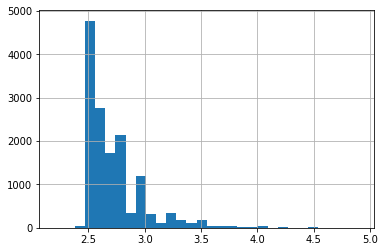

In [320]:
good_df['ceiling_height'].fillna(good_df['ceiling_height'].median())
good_df['ceiling_height'].hist(bins=30)

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Могу посоветовать посмотреть данные материалы, чтобы научиться оформлять графики еще лучше:

[Здесь](https://pyprog.pro/mpl/mpl_title.html)
  
[И здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html)
    
   

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо! 🙏</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Рад помочь) </div>

#### floors_total

Количество записей, где не указана высота дома, сравнительно неболшое, поэтому мы их просто удалим

In [321]:
good_df = good_df.dropna(subset=['floors_total'])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, их можно просто отбросить </div>

Посмотрим как распределена этажность:

<AxesSubplot:>

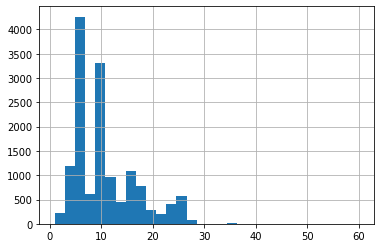

In [322]:
good_df['floors_total'].hist(bins=30)

Поиск в гугл говорит, что в Санкт-Петербурге самое высокое здание - 88 этажей, поэтому не будем удалять сликом большие значения этажности

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> На самом деле самое высокое <b>жилое</b> здание все же гораздо ниже) </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Значит, удалим: </div>

<AxesSubplot:>

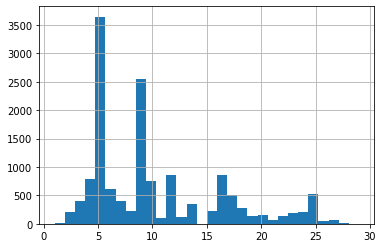

In [323]:
good_df = good_df[good_df['floors_total'] < 30]
good_df['floors_total'].hist(bins=30)

<div class="alert alert-info"> <b>Комментарий студента:</b> Считаем, что нет жилых домов больше 30 этажей </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо </div>

#### living_area и kitchen_area

Мы не можем заменить нулевые значения на обычную медиану, так как жилая площать и площадь кухни зависят от общей площадить. Для этого мы найдем процент, сколько примерно составляет кухня и жилая комната от общей площади, и уже установим значения living_area и kitchen_area пропорционально общей площади конкретных квартир.

In [324]:
has_kitchen_info = good_df[~good_df['kitchen_area'].isnull()]
has_living_area_info = has_kitchen_info[~has_kitchen_info['living_area'].isnull()]

In [325]:
has_living_area_info = has_living_area_info.copy(); 
has_living_area_info.loc[:,'kitchen_percentage'] = has_living_area_info['kitchen_area'] / has_living_area_info['total_area']
kitchen_median_percentage = has_living_area_info.loc[:,'kitchen_percentage'].median()
kitchen_median_percentage

0.16666666666666669

In [326]:
has_living_area_info.loc[:,'living_percentage'] = has_living_area_info['living_area'] / has_living_area_info['total_area']
living_median_percentage = has_living_area_info.loc[:,'living_percentage'].median()
living_median_percentage

0.573134328358209

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Использование коэффициента тут хорошее решение

In [327]:
good_df['kitchen_area'] = good_df['kitchen_area'].where(~good_df['kitchen_area'].isnull(),kitchen_median_percentage * good_df['total_area'])

In [328]:
good_df['living_area'] = good_df['living_area'].where(~good_df['living_area'].isnull(),living_median_percentage * good_df['total_area'])

<AxesSubplot:>

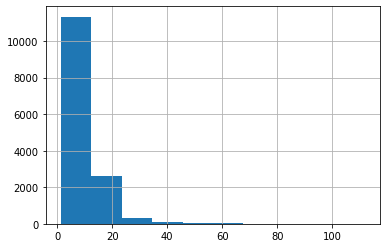

In [329]:
good_df['kitchen_area'].hist()

<AxesSubplot:>

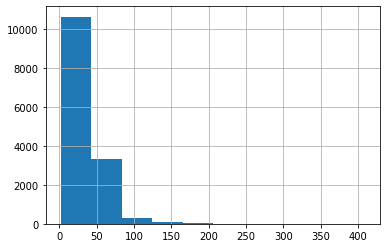

In [330]:
good_df['living_area'].hist()

#### balcony

In [331]:
good_df['balcony'] = good_df['balcony'].fillna(0)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, пропуски можно заполнить нулями

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но стоит оставить хотя бы небольшой комментарий)

<div class="alert alert-info"> <b>Комментарий студента:</b> Заполним нулями, так как если информация о балконе не указана, то его, скорее всего, нет. Обычно наличие балкона считается плюсом, поэтому в объявлениях их обязательно указывают, если балконы есть</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Верно </div>

#### is_apartment

In [332]:
good_df['is_apartment'] = good_df['is_apartment'].fillna(False)

<div class="alert alert-info"> <b>Комментарий студента:</b> Дальше в исследование эта информация никак не используется, поэтому заполнить можно любыми значениями. Мы заполним False, так как, скоре всего, если не указали, что это аппартаменты, значит, скорее всего, это не они</div>

#### locality_name 

In [333]:
good_df = good_df[~good_df['locality_name'].isnull()]

<div class="alert alert-info"> <b>Комментарий студента:</b> Дальше в исследовании мы будем разбивать на группы по названию места, где находится квартира, поэтому названия нам нужны. Удалим записи без названий</div>

#### airports_nearest        

In [334]:
good_df['airports_nearest']

0        18863.0
4        31856.0
9        50898.0
10       38357.0
13       37868.0
          ...   
23691    19424.0
23693    45602.0
23694    24665.0
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 14418, dtype: float64

<div class="alert alert-info"> <b>Комментарий студента:</b> С этим, скорее всего, ничего не сделать.</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Также логичная обработка, но все же тут и далее нужны хотя бы какие-то комментарии)

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Здорово добавил везде небольшие комментарии </div>

In [335]:
good_df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [336]:
good_df['first_day_exposition'] = pd.to_datetime(good_df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [337]:
good_df['first_day_exposition'] = good_df['first_day_exposition'].dt.round('1D')

In [338]:
good_df['floors_total'] = good_df['floors_total'].astype('int')
good_df['ponds_around3000'] = good_df['ponds_around3000'].fillna(0)
good_df['ponds_around3000'] = good_df['ponds_around3000'].astype('int')
good_df['parks_around3000'] = good_df['parks_around3000'].fillna(0)
good_df['parks_around3000'] = good_df['parks_around3000'].astype('int')
good_df['last_price'] = good_df['last_price'].astype('int')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Такие типы данных тут смотрятся логичнее

In [339]:
good_df=good_df.dropna(subset=['days_exposition'])
good_df['days_exposition'].describe()

count    11981.000000
mean       190.304232
std        228.674332
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Не соглашусь с удалением пропусков в days_exposition. Обрати внимание, какое количество данных мы теряем при такой фильтрации, имеет-ли она смысл при таком количестве удалений значений

<div class="alert alert-info"> <b>Комментарий студента:</b> Честно, не знаю как тут лучше сделать. С одной стороны данные должны по-любому быть, так как данный тип вводит не сам пользователь, а система сама может определить, сколько висело объявление. Во-вторых, если этих значений нет, то скорее всего квартиры либо до сих пор не проданы, либо объявления, может быть, были заблокированы еще до размещения. В общем, мне кажется, что лучше не учитывать такие записи, ведь мы совсем ничего не знаем о природе ошибок.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Это ведь совсе необязательно ошибка) Попробуй например посмотреть на пропуски в days_exposition по годам из first_day_exposition, ты заметишь, что пропусков больше всего к актуальной дате, значит вероятнее всего это просто еще неснятые объявления. Также ведь если там пропуск это совсем не значит, что это априори ошибка.

Но впрочем не буду считать это как недочет, объяснил свое решение ты хорошо)</div>

In [340]:
print('Процент, удаления:', len(good_df[good_df['cityCenters_nearest'].isna()])/len(good_df['cityCenters_nearest']),'%')


Процент, удаления: 0.19731241131792004 %


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Тут также посмотри пожалуйста, сколько процентов данных мы удаляем

<div class="alert alert-info"> <b>Комментарий студента:</b> Действительно, много. Тогда не будем удалять, а заполним медианой</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Ок </div>

In [341]:
good_df['cityCenters_nearest'] = good_df['cityCenters_nearest'].fillna(good_df['cityCenters_nearest'].median())

In [342]:
good_df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        2383
cityCenters_nearest        0
parks_around3000           0
parks_nearest           7648
ponds_around3000           0
ponds_nearest           7277
days_exposition            0
dtype: int64

In [343]:
good_df['locality_name'] = good_df['locality_name'].str.replace('ё','е')
good_df['locality_name'] = good_df['locality_name'].str.replace(' городского типа ',' ')
good_df['locality_name'] = good_df['locality_name'].str.replace('городской поселок ','поселок ')
good_df['locality_name'] = good_df['locality_name'].str.replace('поселок при железнодорожной станции ','поселок станции ')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что поработал с неявными дубликатами

In [344]:
good_df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалево', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'деревня Агалатово',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       'деревня Гарболово', 'деревня Глинка', 'деревня Горбунки',
       'деревня Гостилицы', 'деревня Занев

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе "Предобработка данных" было проведено так много анализа и работы, все же стоит написать по нему хотя бы короткий вывод

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывод. Данные изначально были не в очень хорошем состоянии, но после предобработки осталось достаточно много объявлений, чтобы дальше проводить исследование</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Так раздел стал выглядеть целостнее </div>

### Посчитайте и добавьте в таблицу новые столбцы

In [345]:
good_df['one_square_meter_price'] = good_df['last_price'] / good_df['total_area']
good_df['one_square_meter_price'] = good_df['one_square_meter_price'].astype('int')
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,0.0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1.0,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,0.0,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,81707


Удалим из выборки квартиры с неправдоподобно низкими ценами и высокими ценами

In [346]:
good_df = good_df[good_df['one_square_meter_price'] > 40_000]
good_df = good_df[good_df['one_square_meter_price'] < 800_000]

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, это действительно похоже на аномалии

In [347]:
good_df['weekday_exposition'] = good_df['first_day_exposition'].dt.weekday
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525,3
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943,5
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,81707,3


In [348]:
good_df['month_exposition'] = good_df['first_day_exposition'].dt.month
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,2
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,38357.0,13878.0,1,310.0,2,553.0,137.0,127525,3,11
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,37868.0,33058.0,1,294.0,3,298.0,366.0,82943,5,7
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,22108.0,10698.0,3,420.0,0,NaN,397.0,81707,3,11


In [349]:
good_df['year_exposition'] = good_df['first_day_exposition'].dt.year
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,13878.0,1,310.0,2,553.0,137.0,127525,3,11,2017
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,33058.0,1,294.0,3,298.0,366.0,82943,5,7,2017
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,10698.0,3,420.0,0,NaN,397.0,81707,3,11,2017


In [350]:
def stage_category(current, total):
    if current == 1:
        return 'первый'
    if current == total:
        return 'последний'
    return 'другой'

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Рабочая функция

In [351]:
good_df['floor_category'] = good_df[['floor','floors_total']].apply(lambda x: stage_category(*x), axis=1)
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,0,NaN,289.0,88524,6,2,2017,другой
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,1,310.0,2,553.0,137.0,127525,3,11,2017,другой
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1,294.0,3,298.0,366.0,82943,5,7,2017,последний
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,3,420.0,0,NaN,397.0,81707,3,11,2017,первый


In [352]:
good_df['cityCenters_nearest_km'] = good_df['cityCenters_nearest'].apply(lambda x: int(x/1000))
good_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,127525,3,11,2017,другой,13
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3,298.0,366.0,82943,5,7,2017,последний,33
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0,NaN,397.0,81707,3,11,2017,первый,10


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Великолепно, все пункты задания выполнены в полном объёме

### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов:

##### общая площадь;

<AxesSubplot:>

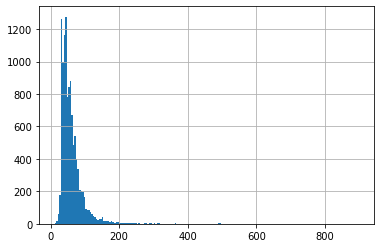

In [353]:
good_df['total_area'].hist(bins=200)

видим, что большинство квартир от имеют площадь до 300 кв. метром, поэтому на всякий случай исключим слишком большие квартиры, чтобы они не повлияли на результат исследования

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В целом, такая фильтрация допустима

In [354]:
good_df = good_df[good_df['total_area'] < 300]

<AxesSubplot:>

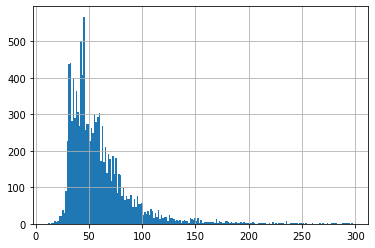

In [355]:
good_df['total_area'].hist(bins=200)

гистограма скошена влево, распределение похоже на распределение Пуассона

##### жилая площадь;


<AxesSubplot:>

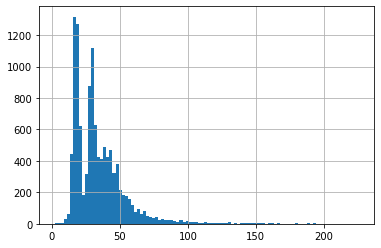

In [356]:
good_df['living_area'].hist(bins=100)

Здесь видим 2 пика

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо

##### площадь кухни;


<AxesSubplot:>

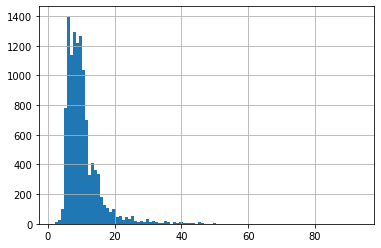

In [357]:
good_df['kitchen_area'].hist(bins=100)

Тоже похоже на распределение Пуассона

##### цена объекта;


<AxesSubplot:>

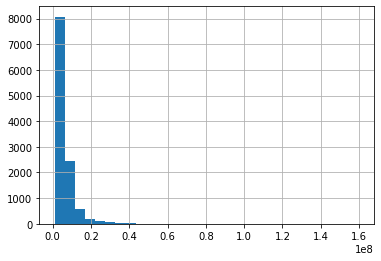

In [358]:
good_df['last_price'].hist(bins=30)

Видим, что в выборке присутствуют отдельные очень дорогие квартиры

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Хорошо бы здесь поработать над range)

##### количество комнат;


<AxesSubplot:>

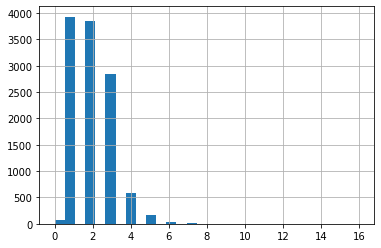

In [359]:
good_df['rooms'].hist(bins=30)

Больше всего однокомнатных и двухкомнатных

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Логично

##### высота потолков;


<AxesSubplot:>

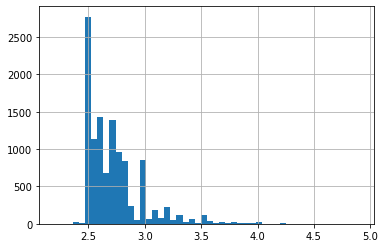

In [360]:
good_df['ceiling_height'].hist(bins=50)

Больше всего квартир с потолками около 2.5 метров

##### этаж квартиры;


<AxesSubplot:>

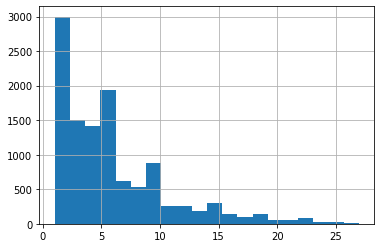

In [361]:
good_df['floor'].hist(bins=20)

На низких этажах квартиры продают чаще. Наверное, потому что в Санкт-Петербурге не так много многоэтажек с этажностью больше 10

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, в основном застройка низкоэтажная

##### тип этажа квартиры («первый», «последний», «другой»);


<AxesSubplot:>

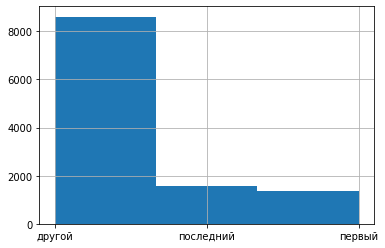

In [362]:
good_df['floor_category'].hist(bins=3)

Видим, что и первый и последний этажи составляют примерно по 1/7 или 15% от других

##### общее количество этажей в доме;


<AxesSubplot:>

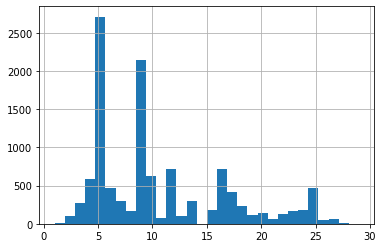

In [363]:
good_df['floors_total'].hist(bins=30)

Большинство многоэтажек до 10 этажей, но встречаются и очень высокие дома

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Типовые дома выделяются

##### расстояние до центра города в километрах;


<AxesSubplot:>

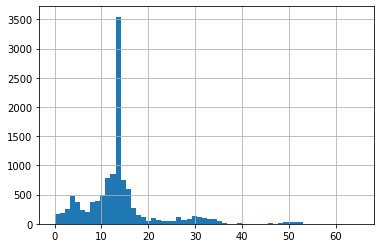

In [364]:
good_df['cityCenters_nearest_km'].hist(bins=60)

Большинство квартир не в самом центра, а на расстоянии около 15 км от него

##### расстояние до ближайшего аэропорта;


<AxesSubplot:>

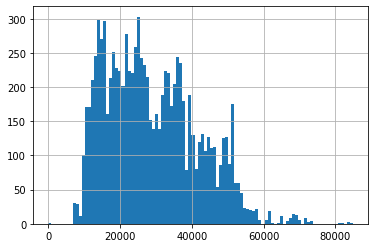

In [365]:
good_df['airports_nearest'].hist(bins=100)

Рядом с аэропортом почти нет квартир. Наверное, там нельзя строить

##### расстояние до ближайшего парка;


<AxesSubplot:>

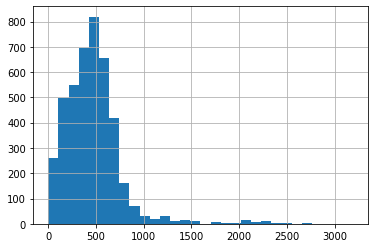

In [366]:
good_df['parks_nearest'].hist(bins=30)

Есть квартиры прям у парка, но большинство находится в пределах одного километра от парка

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все параметры удаленности разобраны

##### день и месяц публикации объявления.


<AxesSubplot:>

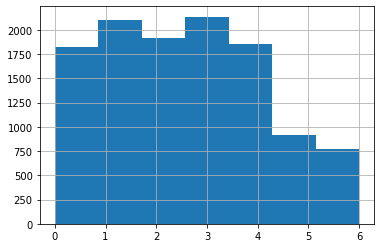

In [367]:
good_df['weekday_exposition'].hist(bins=7)

Реже всего размещают объявления в воскресенье

<AxesSubplot:>

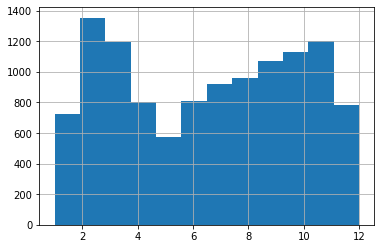

In [368]:
good_df['month_exposition'].hist(bins=12)

В феврале чаще всего размещают объявления. Реже всего в мае

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Временные показатели также проанализированы

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [369]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2,553.0,137.0,127525,3,11,2017,другой,13
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3,298.0,366.0,82943,5,7,2017,последний,33
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0,NaN,397.0,81707,3,11,2017,первый,10


<AxesSubplot:>

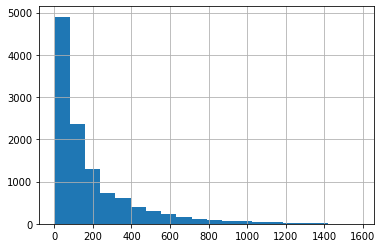

In [370]:
good_df['days_exposition'].hist(bins=20)

In [371]:
good_df['days_exposition'].describe()

count    11514.000000
mean       189.413323
std        228.829198
min          1.000000
25%         45.000000
50%        103.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

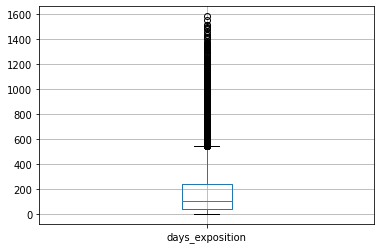

In [372]:

good_df.boxplot(column='days_exposition')

Продажа квартиры обычно занмиает 101 день. Быстрыми продажами можно назвать те, которые совершены меньше, чем за 101 день. Необычно долгие продажи - те, срок которых превышает 241 день. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, границы days_exposition установлены

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:

общей площади;

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

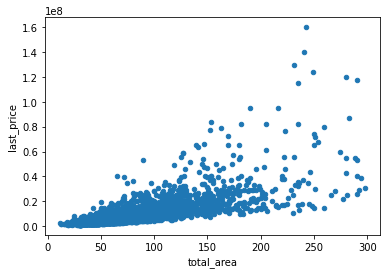

In [373]:
good_df.plot(x='total_area',y='last_price', kind='scatter')

In [374]:
good_df['total_area'].corr(good_df['last_price'])

0.7415358628295061

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, что анализируешь как линейную, так и нелинейную зависимость

жилой площади;

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

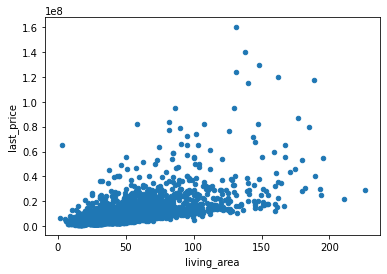

In [375]:
good_df.plot(x='living_area',y='last_price', kind='scatter')

In [376]:
good_df['living_area'].corr(good_df['last_price'])

0.6541197310617448

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо

площади кухни;

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

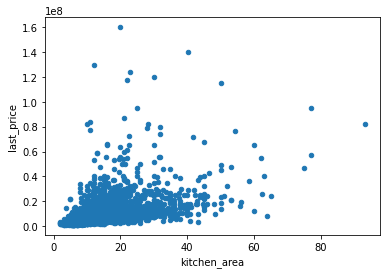

In [377]:
good_df.plot(x='kitchen_area',y='last_price', kind='scatter')

In [378]:
good_df['kitchen_area'].corr(good_df['last_price'])

0.5612055668575985

количества комнат;

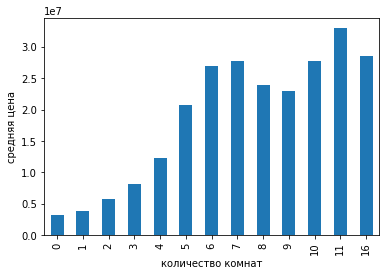

In [379]:
ax = good_df.groupby('rooms').mean()['last_price'].plot(kind='bar')
ax.set_xlabel('количество комнат')
ax.set_ylabel('средняя цена')

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Чем больше комнат, тем в среднем дороже квартира, что логично, но когда комнат много (бошьше 6) то на цену больше влияют, скорее, другие параметры</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично </div>

<AxesSubplot:ylabel='last_price'>

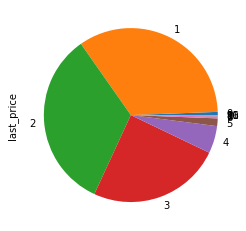

In [380]:
good_df.groupby('rooms').count()['last_price'].plot(kind='pie')

<div class="alert alert-info"> <b>Комментарий студента:</b> Больше всего объявлений с однушками и двушками</div>

In [381]:
good_df['rooms'].corr(good_df['last_price'])

0.4564512929348961

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но для комнат и всех следующих показателей диаграмма рассеяния не лучшее решение, ведь это дискретные и категорийные параметры. По ним стоит построить линейные графики

этажа, на котором расположена квартира (первый, последний, другой);

<AxesSubplot:ylabel='last_price'>

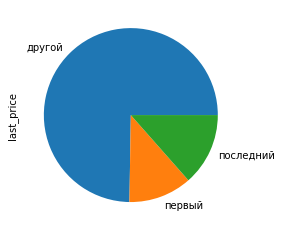

In [382]:
good_df.groupby('floor_category').count()['last_price'].plot(kind='pie')

<div class="alert alert-info"> <b>Комментарий студента:</b> На последнем этаже квартир продается больше, чем на первом</div>

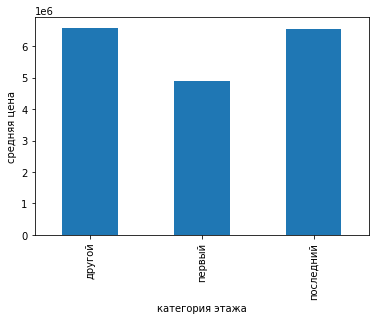

In [383]:
ax = good_df.groupby('floor_category').mean()['last_price'].plot(kind='bar')
ax.set_xlabel('категория этажа')
ax.set_ylabel('средняя цена')

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> На первом этаже квартиры в среднем дешевле</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Довольно логично </div>

даты размещения (день недели).

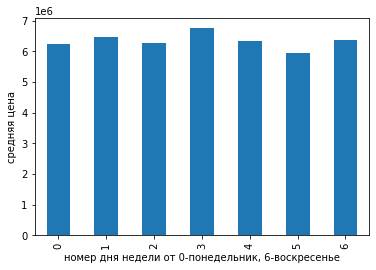

In [384]:
ax = good_df.groupby('weekday_exposition').mean()['last_price'].plot(kind='bar')
ax.set_xlabel('номер дня недели от 0-понедельник, 6-воскресенье')
ax.set_ylabel('средняя цена')

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> В среднем на цену квартиры не так сильно влияет день недели, когда квартиры были размещены</div>

In [385]:
good_df['weekday_exposition'].corr(good_df['last_price'])

-0.0012495112943635013

даты размещения (месяц).

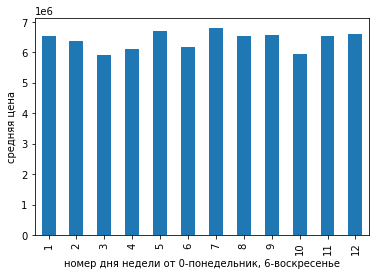

In [386]:
ax = good_df.groupby('month_exposition').mean()['last_price'].plot(kind='bar')
ax.set_xlabel('номер дня недели от 0-понедельник, 6-воскресенье')
ax.set_ylabel('средняя цена')

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> В среднем на цену квартиры не так сильно влияет месяц, когда квартиры были размещены</div>

In [387]:
good_df['month_exposition'].corr(good_df['last_price'])

0.010037367038250335

даты размещения (год).

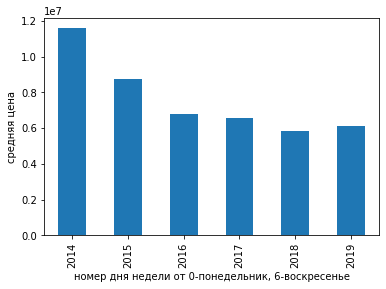

In [388]:
ax = good_df.groupby('year_exposition').mean()['last_price'].plot(kind='bar')
ax.set_xlabel('номер дня недели от 0-понедельник, 6-воскресенье')
ax.set_ylabel('средняя цена')

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Раньше (в 2014 году) размещали в среднем более дорогие квартиры. Сейчас, наверное, больше строят очень маленькие и дешевые, которые уменьшают среднюю цену</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Ко всем временным показателям также добавлены комментарии </div>

In [389]:
good_df['year_exposition'].corr(good_df['last_price'])

-0.09663767877798528

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Также у каждого изучения связи должен быть хотя бы короткий комментарий в качестве описания, сейчас добавлены только графики

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
   

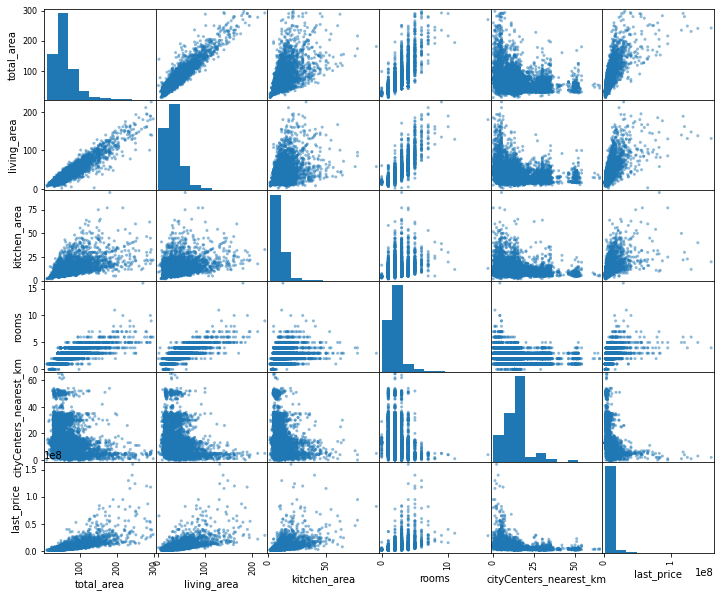

In [390]:
df_for_matrix = good_df[['total_area','living_area', 'kitchen_area', 'rooms', 'cityCenters_nearest_km', 'last_price']]
pd.plotting.scatter_matrix(df_for_matrix, figsize=(12,10))

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [391]:
df_locality = good_df.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc=['count','mean','median','max','min'])
df_locality.columns = ['count','mean','median','max','min']
df_locality_ten = df_locality.sort_values(by='count', ascending=False).head(10)
df_locality_ten

,count,mean,median,max,min
locality_name,,,,,
Санкт-Петербург,8328,112011.962056,103503.0,660000,41025
Всеволожск,220,66859.022727,65598.5,133333,44111
поселок Мурино,211,87105.928910,86042.0,138580,53133
поселок Шушары,189,78378.978836,77358.0,126666,54237
Пушкин,187,101940.385027,97315.0,256521,59836
Колпино,179,75062.156425,73333.0,125000,53333
Петергоф,126,83801.976190,81322.5,135970,64024
Гатчина,123,69927.902439,69354.0,103076,49295
деревня Кудрово,122,90777.565574,91291.5,125949,54160


Больше всего объявлений в Санкт-Петербурге. Медиана не сильно отличается от среднего. Значит, скорее всего, имеющиеся вбросы не сильно будут влиять на исследование

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Код для решения задания правильный

In [392]:
df_locality_ten.sort_values(by='min')['min']

locality_name
Санкт-Петербург      41025
Всеволожск           44111
поселок Парголово    48543
Гатчина              49295
поселок Мурино       53133
Колпино              53333
деревня Кудрово      54160
поселок Шушары       54237
Пушкин               59836
Петергоф             64024
Name: min, dtype: int64

In [393]:
df_locality_ten.sort_values(by='max', ascending=False)['max']

locality_name
Санкт-Петербург      660000
Пушкин               256521
поселок Мурино       138580
поселок Парголово    138522
Петергоф             135970
Всеволожск           133333
поселок Шушары       126666
деревня Кудрово      125949
Колпино              125000
Гатчина              103076
Name: max, dtype: int64

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [394]:
spb_df = good_df[good_df['locality_name'] == 'Санкт-Петербург']
spb_km = spb_df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
spb_km.columns = ['mean_price']
spb_km['mean_price'] = spb_km['mean_price'].astype('int')
spb_km

,mean_price
cityCenters_nearest_km,
0,16276642
1,15738097
2,14265205
3,11100125
4,12862834
5,12620899
6,11768201
7,9796393
8,8379226


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо составил таблицу со средними ценами

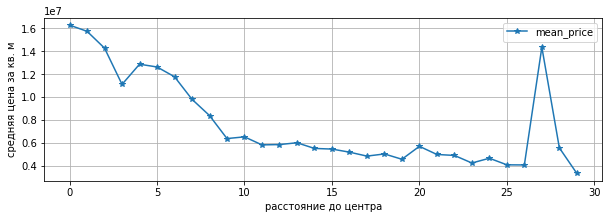

In [395]:
ax = spb_km.plot(style='*-', y='mean_price',figsize=(10,3), grid=True)
ax.set_xlabel('расстояние до центра')
ax.set_ylabel('средняя цена за кв. м')

plt.show()

Видим, что в центре квартиры намного дороже, причем зависимость нелинейная (похоже на экспоненциальную). Кроме того, на расстоянии от 26 до 29 км от центра средняя цена квартир также высокая. Возможно, там находится элитный район

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И график как раз в этом случае подобрал наиболее подходящий, отлично

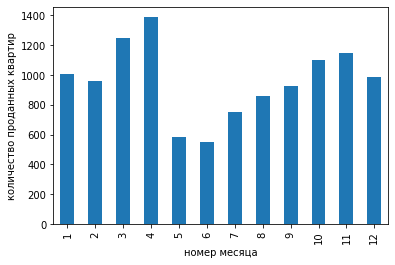

In [396]:
good_df['month_sell'] = good_df['first_day_exposition'] + pd.to_timedelta(good_df['days_exposition'],'D')
good_df['month_sell'] = good_df['month_sell'].dt.month
ax = good_df.groupby('month_sell').count()['last_price'].plot(kind='bar')
ax.set_xlabel('номер месяца')
ax.set_ylabel('количество проданных квартир')

plt.show()

<div class="alert alert-info"> <b>Новый дополнительный вывод:</b> Больше всего сделок с квартирами в апреле. Летом квартиры покупают и продают реже</div>

### Общий вывод

Больше всего на общую стоимость квартир влияет их общая площадь. А на стоимость одного квадратного метра - расстояние от центра города.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но все же во всей работе мы не только проводили исследование зависимости цена-параметр, было много всего другого) Общий вывод стоит дополнить

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Иван, проект отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Но всё же в проекте есть несколько замечаний и я попрошу тебя исправить их, чтобы он стал еще лучше! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> И хорошо дополнил общий вывод </div>

<div class="alert alert-info"> <b>Вывод:</b> С полученными данными можно работать. В результате анализа было выявлено несколько интересных результатов
<ul>
    <li>
        Больше всего на общую стоимость квартир влияет их общая площадь.
    </li>
        <li>
        Больше всего на общую стоимость квартир влияет их общая площадь.
    </li>
    <li>
        Типовыми домами являются 5-ти и 9-ти этажки.
    </li>
    <li>
        Застройка в Петербурге в основном низкоэтажная.
    </li>
    <li>
        В феврале чаще всего размещают объявления. Реже всего в мае.
    </li>
    <li>
        Большинство квартир не в самом центра, а на расстоянии около 15 км от него.
    </li>
    <li>
        Больше всего квартир с потолками около 2.5 метров.
    </li>
    <li>
        Продажа квартиры обычно занмиает 101 день.
    </li>
    <li>
        Когда комнат много (бошьше 6) то на цену больше влияют, скорее, другие параметры.
    </li>
    <li>
        На первом этаже квартиры в среднем дешевле.
    </li>    
    <li>
        Средняя цена на квартиру в центре Санкт-Петербурга в радиусе до 6 км находится в диапазоне от 100 до 150. 
    </li>  
    <li>
        Больше всего сделок с квартирами в апреле. Летом квартиры покупают и продают реже
    </li>  
</ul>
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div class="alert alert-info"> <h1> Спасибо за проверку! 🙏 </h1> </div>